In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import numpy as np
CSV = './all_stock_price/public/2330.TW.csv'

daily_trade =pd.read_csv('{}'.format(CSV))
daily_trade = daily_trade.to_dict()

Dic_Open = {}
Dic_High = {}
Dic_Low = {}
Dic_Close = {}
Dic_Volume = {}


for count in range(len(daily_trade['Date'])):
    Dic_Open[daily_trade['Date'][count]] = daily_trade['Open'][count]
    Dic_High[daily_trade['Date'][count]] = daily_trade['High'][count]
    Dic_Low[daily_trade['Date'][count]] = daily_trade['Low'][count]
    Dic_Close[daily_trade['Date'][count]] = daily_trade['Close'][count]
    Dic_Volume[daily_trade['Date'][count]] = daily_trade['Volume'][count]

In [2]:
# from dict ----> dataframe -----> plot
def simple_plot_function(fun = {'a':1.0},name = 'name',astype = 'float64'):
    name = str(name)
    if not type(fun)== dict:
        print('type error')

    else:    
        df  = pd.Series( fun,fun.keys(),name=name ).to_frame()
        df[name] = df[name].astype(astype)
    return df[name].plot(kind = 'line')

In [3]:
L = [l for l in Dic_Close.values()]
D = [d for d in daily_trade['Date'].values()]

# 均線(移動平均)

In [4]:
# 均線(移動平均)
def Moving_Average(interval = 5):
    L = [l for l in Dic_Close.values()]
    Dic_MA = {}
    interval  =int(interval)
    for i in range(len(L)):
        if i-interval <0:
            pass
        else:
            Dic_MA[D[i]]="{:.2f}".format(sum(L[i-interval:i])/interval)
    return Dic_MA
# 向上開花
def All_Average():
    Result = []
    All_Moving_Average = {}
    for date in Moving_Average(60):
        All_Moving_Average[date] = [Moving_Average(5)[date],Moving_Average(10)[date],Moving_Average(20)[date],Moving_Average(60)[date]]

    for date in All_Moving_Average.keys():
        M5 = All_Moving_Average[date][0]
        M10 = All_Moving_Average[date][1]
        M20 = All_Moving_Average[date][2]
        M60 = All_Moving_Average[date][3]
        if M5 >= max(All_Moving_Average[date]) and M60 <= min(All_Moving_Average[date]) and M10 >= M20:
            Result.append(date)
    return Result
Moving_Average(interval = 5)

{'2016-01-11': '115.40',
 '2016-01-12': '114.30',
 '2016-01-13': '113.45',
 '2016-01-14': '113.11',
 '2016-01-15': '112.86',
 '2016-01-18': '113.37',
 '2016-01-19': '114.04',
 '2016-01-20': '114.89',
 '2016-01-21': '115.06',
 '2016-01-22': '115.66',
 '2016-01-25': '115.91',
 '2016-01-26': '116.33',
 '2016-01-27': '116.25',
 '2016-01-28': '117.10',
 '2016-01-29': '117.95',
 '2016-02-01': '118.71',
 '2016-02-02': '119.47',
 '2016-02-03': '120.32',
 '2016-02-15': '121.43',
 '2016-02-16': '122.28',
 '2016-02-17': '123.04',
 '2016-02-18': '123.72',
 '2016-02-19': '125.16',
 '2016-02-22': '126.01',
 '2016-02-23': '127.03',
 '2016-02-24': '127.37',
 '2016-02-25': '127.37',
 '2016-02-26': '127.28',
 '2016-03-01': '126.94',
 '2016-03-02': '127.11',
 '2016-03-03': '127.70',
 '2016-03-04': '128.72',
 '2016-03-07': '129.06',
 '2016-03-08': '129.57',
 '2016-03-09': '129.57',
 '2016-03-10': '129.57',
 '2016-03-11': '129.66',
 '2016-03-14': '130.08',
 '2016-03-15': '130.76',
 '2016-03-16': '131.18',


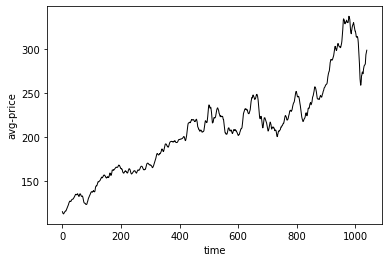

<Figure size 864x216 with 0 Axes>

In [5]:
# DEMO

Dic = Moving_Average(interval = 5)
List = [float(d) for d in Dic.values()]

plt.ylabel('avg-price')
plt.xlabel('time')
plt.plot(List,linewidth=1, color='black')

plt.figure(figsize=(12,3))
plt.show()

In [6]:
# Bias
def Bias(days = 3,date = '2020-02-19'):
    try:
        x = Dic_Close[date]
        y = float( Moving_Average( interval = days )[date] )
        Result = (x-y)/y
    except KeyError as f:
        Result = 100.0
    return Result

In [7]:
# Bias Demo
Bias_Dic = {}
for date in Dic_Close.keys(): 
        Bias_Dic[date] = Bias(days = 3,date = date)
        
# Bias in (0,0.1)
for date in Bias_Dic.keys():
    if 0 <= Bias_Dic[date] < 0.1:
        print(date)

2016-01-13
2016-01-15
2016-01-18
2016-01-19
2016-01-22
2016-01-25
2016-01-27
2016-01-28
2016-01-29
2016-02-01
2016-02-02
2016-02-03
2016-02-15
2016-02-16
2016-02-17
2016-02-18
2016-02-19
2016-02-22
2016-02-25
2016-03-01
2016-03-02
2016-03-03
2016-03-09
2016-03-10
2016-03-11
2016-03-14
2016-03-16
2016-03-17
2016-03-18
2016-03-21
2016-03-23
2016-03-28
2016-03-29
2016-03-30
2016-03-31
2016-04-08
2016-04-11
2016-04-12
2016-04-13
2016-04-14
2016-04-21
2016-04-22
2016-04-25
2016-04-26
2016-05-06
2016-05-09
2016-05-17
2016-05-18
2016-05-19
2016-05-20
2016-05-23
2016-05-24
2016-05-25
2016-05-26
2016-05-27
2016-05-30
2016-05-31
2016-06-01
2016-06-02
2016-06-03
2016-06-06
2016-06-07
2016-06-08
2016-06-17
2016-06-20
2016-06-21
2016-06-22
2016-06-28
2016-06-29
2016-06-30
2016-07-01
2016-07-04
2016-07-07
2016-07-08
2016-07-11
2016-07-12
2016-07-13
2016-07-15
2016-07-18
2016-07-19
2016-07-20
2016-07-21
2016-07-22
2016-07-25
2016-07-26
2016-07-27
2016-07-28
2016-08-01
2016-08-02
2016-08-05
2016-08-08

# 指數移動平均  12days 26days

In [8]:
def EMA(day = 12):

    Result_List = []
    Result_Dic = {}
    day  =int(day)
    for i in range(len(L)):
        denominator_EMA = 0
        fraction_EMA = 0
        if i-day < 0:
            Result_List.append('NaN')
        else:
            interval_price = L[i - day:i]
            alpha = ((2/(day+1)))
            for c in range(day):
                denominator_EMA += (1-alpha)**c
                fraction_EMA += ((1-alpha)**c)*float(interval_price[c])
            Result_List.append (fraction_EMA / denominator_EMA )
            Result_Dic = dict(zip(D,Result_List))
    return Result_Dic

In [9]:
# 12天指數移動平均
A = EMA(day = 12)
# 26天指數移動平均
B = EMA(day = 26)

C = EMA(day = 9)
for day in A.keys():
    print([C[day],A[day],B[day]])

['NaN', 'NaN', 'NaN']
['NaN', 'NaN', 'NaN']
['NaN', 'NaN', 'NaN']
['NaN', 'NaN', 'NaN']
['NaN', 'NaN', 'NaN']
['NaN', 'NaN', 'NaN']
['NaN', 'NaN', 'NaN']
['NaN', 'NaN', 'NaN']
['NaN', 'NaN', 'NaN']
[115.28005325311165, 'NaN', 'NaN']
[114.42540341967177, 'NaN', 'NaN']
[113.72381150350004, 'NaN', 'NaN']
[113.49192752609284, 115.15479340822877, 'NaN']
[113.69912978324416, 114.45019629619941, 'NaN']
[113.73185500014488, 113.89623551612608, 'NaN']
[114.13042264815512, 113.77108266451059, 'NaN']
[114.66157497925758, 114.09269577158241, 'NaN']
[115.1383522464179, 114.24816147994208, 'NaN']
[116.29109491472701, 114.65651618981964, 'NaN']
[116.4001969566778, 115.15128845138537, 'NaN']
[116.63501526037251, 115.71966271727125, 'NaN']
[116.71603813999093, 116.77264695633684, 'NaN']
[117.6257022816933, 116.99985901181583, 'NaN']
[118.7566107720903, 117.35244882727213, 'NaN']
[119.27969769618936, 117.56648156837466, 'NaN']
[119.77027672694133, 118.50350287814881, 'NaN']
[120.89066366209912, 119.5345

[192.03086617768034, 190.79028813698292, 185.7168288334057]
[191.8913812692159, 191.38966159982553, 186.0641532339472]
[191.9387500096098, 191.42507426336013, 186.75443225847002]
[190.62813666150004, 191.6130560395206, 187.15624868415478]
[189.91100225845233, 191.37084362194256, 187.42739788091313]
[190.01488510515495, 191.42643190782036, 187.54443418195578]
[189.69893423403335, 190.4951863434618, 187.7758080307471]
[189.83777665154133, 190.16794799602883, 187.98981145711684]
[189.82868094910586, 190.3163535429055, 188.08089098678954]
[190.34284760739476, 190.20597410202845, 188.2615882215937]
[190.62522807766618, 190.3870512285205, 188.83445094218115]
[191.25841209924891, 190.5192332871021, 189.41806775168263]
[192.48114382716307, 191.08391381674778, 190.141286733993]
[193.95646249129942, 191.42461634591604, 190.82382219982702]
[194.23855469103438, 192.0312144221189, 191.28166675972312]
[194.96932564588246, 193.02323476099482, 191.64747619889582]
[194.79644862360962, 194.1698646920509

# 繪圖

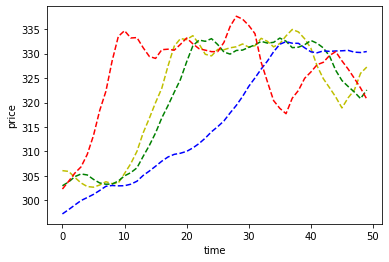

<Figure size 864x216 with 0 Axes>

In [10]:
EMA_9 = [e for e in C.values()]
EMA_12 = [e for e in A.values()]
EMA_26 = [e for e in B.values()]


plt.ylabel('price')
plt.xlabel('time')
plt.plot(EMA_9[950:1000],'y--')
plt.plot(EMA_12[950:1000],'g--')
plt.plot(EMA_26[950:1000],'b--')
plt.plot(List[950:1000],'r--')
plt.figure(figsize=(12,3))
plt.show()

# 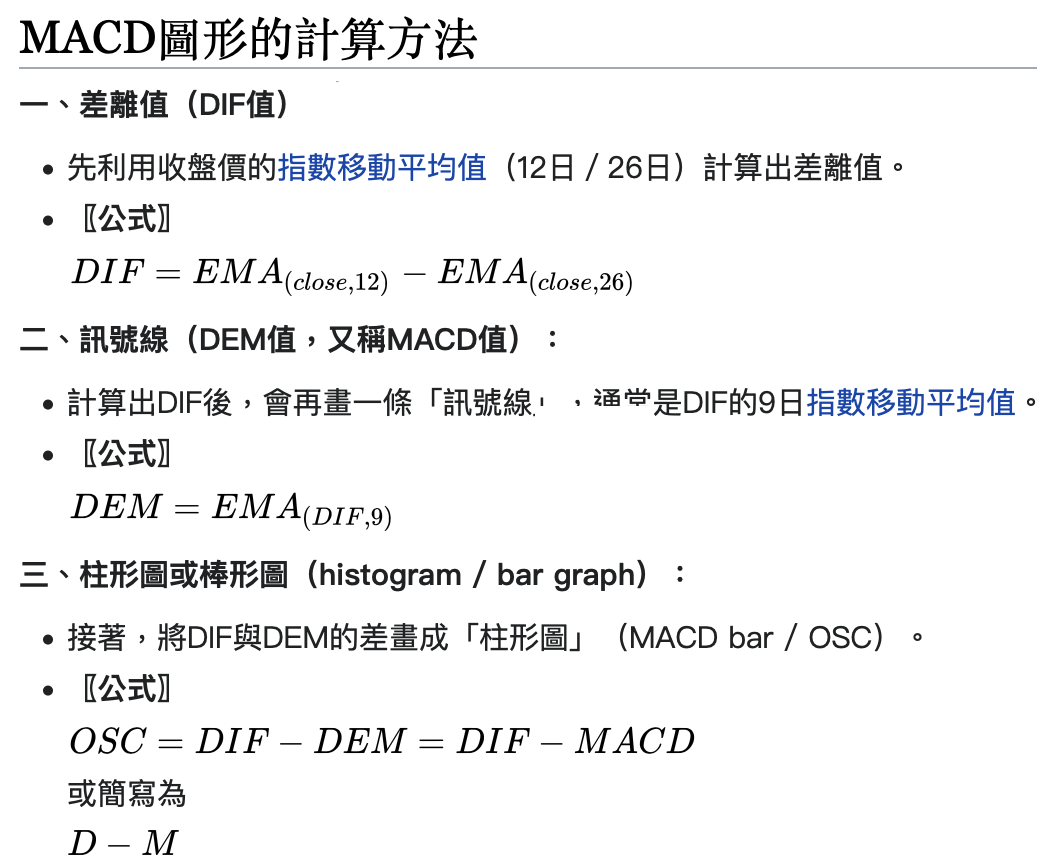

In [11]:
def DIF(day1 = 12,day2 = 26):
    day1 = int(day1)
    day2 = int(day2) 
    Result_List = []
    EMA_1 = [e for e in EMA(day = day1).values()]
    EMA_2 = [e for e in EMA(day = day2).values()]
    for c in range(len(EMA_1)):
        try:
            Result_List.append(EMA_1[c] - EMA_2[c])
        except TypeError as e:
            Result_List.append('NaN')
        Result_Dic = dict(zip(D,Result_List))


            
    return Result_Dic

In [12]:
# DEMO of DIF
DIF(day1 = 12,day2 = 26)

{'2016-01-04': 'NaN',
 '2016-01-05': 'NaN',
 '2016-01-06': 'NaN',
 '2016-01-07': 'NaN',
 '2016-01-08': 'NaN',
 '2016-01-11': 'NaN',
 '2016-01-12': 'NaN',
 '2016-01-13': 'NaN',
 '2016-01-14': 'NaN',
 '2016-01-15': 'NaN',
 '2016-01-18': 'NaN',
 '2016-01-19': 'NaN',
 '2016-01-20': 'NaN',
 '2016-01-21': 'NaN',
 '2016-01-22': 'NaN',
 '2016-01-25': 'NaN',
 '2016-01-26': 'NaN',
 '2016-01-27': 'NaN',
 '2016-01-28': 'NaN',
 '2016-01-29': 'NaN',
 '2016-02-01': 'NaN',
 '2016-02-02': 'NaN',
 '2016-02-03': 'NaN',
 '2016-02-15': 'NaN',
 '2016-02-16': 'NaN',
 '2016-02-17': 'NaN',
 '2016-02-18': 3.404782830071568,
 '2016-02-19': 4.1285297749542735,
 '2016-02-22': 4.681959145435698,
 '2016-02-23': 5.502784197235329,
 '2016-02-24': 5.925561507309126,
 '2016-02-25': 6.438877363536392,
 '2016-02-26': 6.508315658161081,
 '2016-03-01': 6.44629957644905,
 '2016-03-02': 6.776341420981339,
 '2016-03-03': 6.459707877177223,
 '2016-03-04': 6.792597334663199,
 '2016-03-07': 6.767436304580414,
 '2016-03-08': 6.770

In [13]:
def MACD(day = 9):
    mL = [l for l in DIF(day1 = 12,day2 = 26).values()]
    mResult_List = []
    mResult_Dic = {}
    day  =int(day)
    for i in range(len(L)):
        denominator_EMA = 0
        fraction_EMA = 0
        if i-day < 0:
            mResult_List.append('NaN')

        else:
            interval_price = mL[i - day:i]
            alpha = ((2/(day+1)))
            for c in range(day):
                denominator_EMA += (1-alpha)**c
                fraction_EMA += ((1-alpha)**c)*float(interval_price[c])
            mResult_List.append (fraction_EMA / denominator_EMA )
            mResult_Dic = dict(zip(D,mResult_List))
    return mResult_Dic   

In [14]:
# DEMO of DIF
MACD(day = 9)

{'2016-01-04': 'NaN',
 '2016-01-05': 'NaN',
 '2016-01-06': 'NaN',
 '2016-01-07': 'NaN',
 '2016-01-08': 'NaN',
 '2016-01-11': 'NaN',
 '2016-01-12': 'NaN',
 '2016-01-13': 'NaN',
 '2016-01-14': 'NaN',
 '2016-01-15': nan,
 '2016-01-18': nan,
 '2016-01-19': nan,
 '2016-01-20': nan,
 '2016-01-21': nan,
 '2016-01-22': nan,
 '2016-01-25': nan,
 '2016-01-26': nan,
 '2016-01-27': nan,
 '2016-01-28': nan,
 '2016-01-29': nan,
 '2016-02-01': nan,
 '2016-02-02': nan,
 '2016-02-03': nan,
 '2016-02-15': nan,
 '2016-02-16': nan,
 '2016-02-17': nan,
 '2016-02-18': nan,
 '2016-02-19': nan,
 '2016-02-22': nan,
 '2016-02-23': nan,
 '2016-02-24': nan,
 '2016-02-25': nan,
 '2016-02-26': nan,
 '2016-03-01': nan,
 '2016-03-02': nan,
 '2016-03-03': 4.909634297039327,
 '2016-03-04': 5.404244453808249,
 '2016-03-07': 5.826422262094609,
 '2016-03-08': 6.193363213808118,
 '2016-03-09': 6.415141078519109,
 '2016-03-10': 6.5407350449957615,
 '2016-03-11': 6.519555001730323,
 '2016-03-14': 6.452130212493713,
 '2016-03

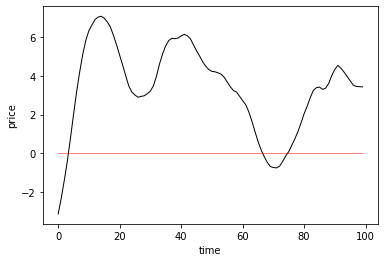

<Figure size 864x216 with 0 Axes>

In [23]:
MACD_List = [x for x in MACD(day = 9).values()]
X = [0 for x in MACD(day = 9).values()]

plt.ylabel('price')
plt.xlabel('time')
plt.plot(MACD_List[100:200],linewidth=1, color='black')
plt.plot(X[100:200], linewidth=0.5, color='red')
plt.figure(figsize=(12,3))
plt.show()

# RSV

# 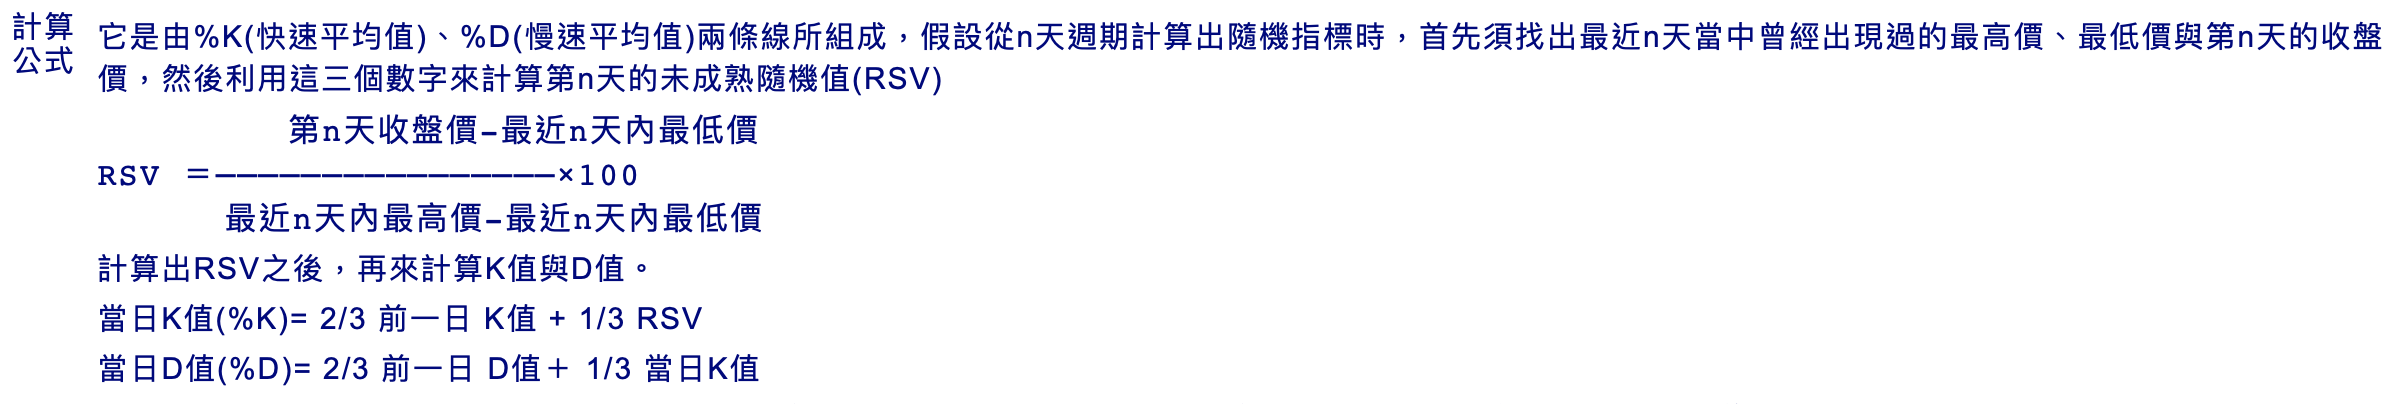

In [16]:
daily_trade =pd.read_csv('{}'.format(CSV))
daily_trade = daily_trade.to_dict()

Dic_Open = {}
Dic_High = {}
Dic_Low = {}
Dic_Close = {}

for count in range(len(daily_trade['Date'])):
    Dic_Open[daily_trade['Date'][count]] = daily_trade['Open'][count]
    Dic_High[daily_trade['Date'][count]] = daily_trade['High'][count]
    Dic_Low[daily_trade['Date'][count]] = daily_trade['Low'][count]
    Dic_Close[daily_trade['Date'][count]] = daily_trade['Close'][count]

In [17]:
for d in Dic_Close.keys():
    print([d,Dic_Open[d],Dic_High[d],Dic_Low[d],Dic_Close[d]])

['2016-01-04', 120.92, 121.77, 117.95, 118.37]
['2016-01-05', 117.95, 118.8, 116.25, 117.1]
['2016-01-06', 117.1, 117.1, 114.55, 114.98]
['2016-01-07', 114.13, 114.55, 110.73, 112.86]
['2016-01-08', 112.01, 114.55, 112.01, 113.7]
['2016-01-11', 112.86, 114.13, 110.73, 112.86]
['2016-01-12', 112.86, 113.7, 111.58, 112.86]
['2016-01-13', 113.28, 114.98, 112.86, 113.28]
['2016-01-14', 110.73, 112.01, 110.73, 111.58]
['2016-01-15', 116.67, 117.1, 114.98, 116.25]
['2016-01-18', 114.55, 117.1, 114.13, 116.25]
['2016-01-19', 116.67, 117.1, 115.4, 117.1]
['2016-01-20', 116.67, 116.67, 113.28, 114.13]
['2016-01-21', 113.7, 115.83, 113.7, 114.55]
['2016-01-22', 115.83, 117.52, 115.4, 117.52]
['2016-01-25', 118.8, 118.8, 117.95, 118.37]
['2016-01-26', 116.67, 117.95, 116.25, 116.67]
['2016-01-27', 117.95, 118.37, 117.52, 118.37]
['2016-01-28', 117.1, 119.22, 117.1, 118.8]
['2016-01-29', 117.52, 121.34, 117.1, 121.34]
['2016-02-01', 122.19, 122.19, 120.07, 122.19]
['2016-02-02', 122.19, 122.61, 12

In [44]:
def RSV(n = 9):
    Close_List = [l for l in Dic_Close.values()]
    High_List = [h for h in Dic_High.values()]
    Low_list = [low for low in Dic_Low.values()]
    D = [d for d in Dic_Close.keys()]
    day = int(n)
    Result_List = []
    for i in range(len(Close_List)):
        denominator_RSV = 0
        fraction_RSV = 0
        min_price = 0.0
        Max_price = 0.0
        Result = 0.0
        if i-day < 0:
            Result_List.append('NaN')
        else:
            interval_close_price = Close_List[i - day:i]
            interval_high_price = High_List[i - day:i]
            interval_low_price = Low_list[i - day:i]            
            min_price = min(interval_low_price)
            Max_price = max(interval_high_price)
            
            denominator_RSV = Max_price - min_price
            fraction_RSV = Close_List[i] - min_price
            Result = fraction_RSV / denominator_RSV
            Result_List.append(Result)
    Result_dict = dict(zip(D,Result_List))
    return Result_dict            

In [45]:
 RSV(n = 9)

{'2016-01-04': 'NaN',
 '2016-01-05': 'NaN',
 '2016-01-06': 'NaN',
 '2016-01-07': 'NaN',
 '2016-01-08': 'NaN',
 '2016-01-11': 'NaN',
 '2016-01-12': 'NaN',
 '2016-01-13': 'NaN',
 '2016-01-14': 'NaN',
 '2016-01-15': 0.5,
 '2016-01-18': 0.6840148698884759,
 '2016-01-19': 1.0,
 '2016-01-20': 0.5337519623233904,
 '2016-01-21': 0.5996860282574566,
 '2016-01-22': 1.0659340659340664,
 '2016-01-25': 1.1251840942562605,
 '2016-01-26': 0.7360594795539037,
 '2016-01-27': 0.946716232961587,
 '2016-01-28': 1.0,
 '2016-01-29': 1.3569023569023577,
 '2016-02-01': 1.1054590570719596,
 '2016-02-02': 0.8574635241301912,
 '2016-02-03': 1.1436588103254772,
 '2016-02-15': 0.8998822143698475,
 '2016-02-16': 1.1054590570719596,
 '2016-02-17': 1.0,
 '2016-02-18': 1.1822079314040714,
 '2016-02-19': 1.0,
 '2016-02-22': 1.0,
 '2016-02-23': 0.7277599142550908,
 '2016-02-24': 0.590568060021436,
 '2016-02-25': 0.8092031425364757,
 '2016-02-26': 0.6666666666666672,
 '2016-03-01': 0.9292929292929267,
 '2016-03-02': 1.09

#  Bonus: Dict to Dataframe 

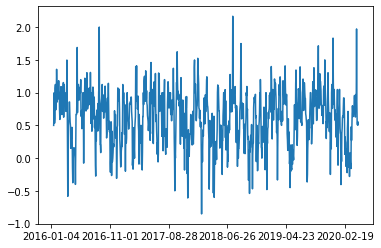

In [20]:
simple_plot_function(fun = RSV(n = 9),name = "RSV",astype = 'float64')

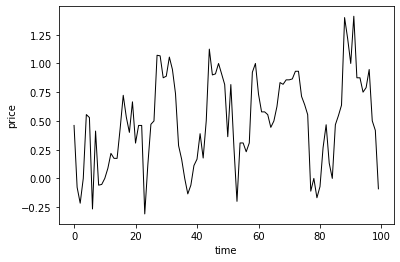

<Figure size 864x216 with 0 Axes>

In [21]:
RSV_List = [x for x in RSV(n = 9).values()]
plt.ylabel('price')
plt.xlabel('time')
plt.plot(RSV_List[200:300],linewidth=1, color='black')

plt.figure(figsize=(12,3))
plt.show()

# KD

# 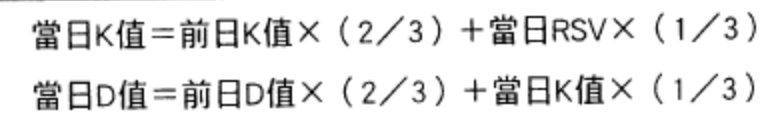

In [53]:
RSV()

{'2016-01-04': 'NaN',
 '2016-01-05': 'NaN',
 '2016-01-06': 'NaN',
 '2016-01-07': 'NaN',
 '2016-01-08': 'NaN',
 '2016-01-11': 'NaN',
 '2016-01-12': 'NaN',
 '2016-01-13': 'NaN',
 '2016-01-14': 'NaN',
 '2016-01-15': 0.5,
 '2016-01-18': 0.6840148698884759,
 '2016-01-19': 1.0,
 '2016-01-20': 0.5337519623233904,
 '2016-01-21': 0.5996860282574566,
 '2016-01-22': 1.0659340659340664,
 '2016-01-25': 1.1251840942562605,
 '2016-01-26': 0.7360594795539037,
 '2016-01-27': 0.946716232961587,
 '2016-01-28': 1.0,
 '2016-01-29': 1.3569023569023577,
 '2016-02-01': 1.1054590570719596,
 '2016-02-02': 0.8574635241301912,
 '2016-02-03': 1.1436588103254772,
 '2016-02-15': 0.8998822143698475,
 '2016-02-16': 1.1054590570719596,
 '2016-02-17': 1.0,
 '2016-02-18': 1.1822079314040714,
 '2016-02-19': 1.0,
 '2016-02-22': 1.0,
 '2016-02-23': 0.7277599142550908,
 '2016-02-24': 0.590568060021436,
 '2016-02-25': 0.8092031425364757,
 '2016-02-26': 0.6666666666666672,
 '2016-03-01': 0.9292929292929267,
 '2016-03-02': 1.09

In [98]:
def K_values(dic = RSV()):
    Days = [d for d in dic.keys()][9:]
    Null_list = ['NaN' for i in range(9)]
    K_value = 0.0
    K_list = []
    for day in Days:
        K_value = (K_value)*(2/3)+ (dic[day])*(1/3)
        K_list.append(K_value)
    K_list = ['NaN' for i in range(9)] + K_list
    Result_Dic = dict(zip([d for d in dic.keys()],K_list))
    return Result_Dic

In [99]:
K_values(dic = RSV())

{'2016-01-04': 'NaN',
 '2016-01-05': 'NaN',
 '2016-01-06': 'NaN',
 '2016-01-07': 'NaN',
 '2016-01-08': 'NaN',
 '2016-01-11': 'NaN',
 '2016-01-12': 'NaN',
 '2016-01-13': 'NaN',
 '2016-01-14': 'NaN',
 '2016-01-15': 0.16666666666666666,
 '2016-01-18': 0.3391160677406031,
 '2016-01-19': 0.5594107118270687,
 '2016-01-20': 0.5508577953258426,
 '2016-01-21': 0.567133872969714,
 '2016-01-22': 0.7334006039578314,
 '2016-01-25': 0.8639951007239743,
 '2016-01-26': 0.8213498936672841,
 '2016-01-27': 0.8631386734320516,
 '2016-01-28': 0.9087591156213677,
 '2016-01-29': 1.0581401960483643,
 '2016-02-01': 1.073913149722896,
 '2016-02-02': 1.0017632745253278,
 '2016-02-03': 1.0490617864587108,
 '2016-02-15': 0.9993352624290897,
 '2016-02-16': 1.0347098606433796,
 '2016-02-17': 1.0231399070955862,
 '2016-02-18': 1.0761625818650813,
 '2016-02-19': 1.0507750545767207,
 '2016-02-22': 1.0338500363844805,
 '2016-02-23': 0.9318199956746839,
 '2016-02-24': 0.8180693504569345,
 '2016-02-25': 0.8151139478167815

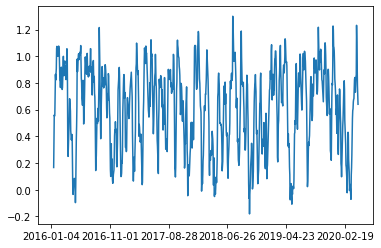

In [100]:
simple_plot_function(fun = K_values(dic = RSV()),name = "K_values",astype = 'float64')

In [101]:
def D_values():
    Result_Dic = K_values(dic = K_values())
    return Result_Dic

In [102]:
D_values()

{'2016-01-04': 'NaN',
 '2016-01-05': 'NaN',
 '2016-01-06': 'NaN',
 '2016-01-07': 'NaN',
 '2016-01-08': 'NaN',
 '2016-01-11': 'NaN',
 '2016-01-12': 'NaN',
 '2016-01-13': 'NaN',
 '2016-01-14': 'NaN',
 '2016-01-15': 0.05555555555555555,
 '2016-01-18': 0.15007572628390473,
 '2016-01-19': 0.2865207214649594,
 '2016-01-20': 0.3746330794185871,
 '2016-01-21': 0.438800010602296,
 '2016-01-22': 0.5370002083874744,
 '2016-01-25': 0.6459985058329744,
 '2016-01-26': 0.7044489684444109,
 '2016-01-27': 0.7573455367736244,
 '2016-01-28': 0.8078167297228721,
 '2016-01-29': 0.8912578851647027,
 '2016-02-01': 0.952142973350767,
 '2016-02-02': 0.9686830737422871,
 '2016-02-03': 0.995475977981095,
 '2016-02-15': 0.9967624061304264,
 '2016-02-16': 1.0094115576347442,
 '2016-02-17': 1.0139876741216916,
 '2016-02-18': 1.0347126433694882,
 '2016-02-19': 1.0400667804385657,
 '2016-02-22': 1.0379945324205373,
 '2016-02-23': 1.0026030201719194,
 '2016-02-24': 0.941091796933591,
 '2016-02-25': 0.8990991805613211,

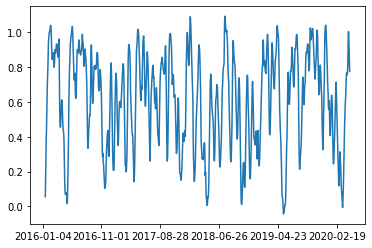

In [103]:
simple_plot_function(fun = D_values(),name = "D_values",astype = 'float64')

# KD 線

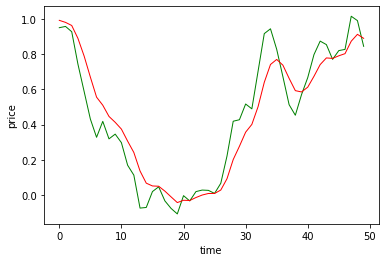

<Figure size 864x216 with 0 Axes>

In [106]:
K_List = [x for x in K_values().values()]
D_List = [x for x in D_values().values()]
plt.ylabel('price')
plt.xlabel('time')
plt.plot(K_List[800:850],linewidth=1, color='green')
plt.plot(D_List[800:850],linewidth=1, color='red')
plt.figure(figsize=(12,3))
plt.show()